<img src="../files/misc/logo.gif" width=300/>
<h1 style="color:#872325">Machine Learning Preliminaries</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

## Álgebra Lineal

**¿Por qué álgebra lineal?**  
Problemas en Machine Learning requiere el manejo de grandes bases de datos, la manipulación de la información dentro de las bases a fin de encontrar patrones por medio de modelos de ML depensen grandemente del álgebra lineal.

Existen tres clases de elementos indispensables para poder trabajar en álgebra líneal. Estos son los escalares, vectores y matrices.

### Escalares
Nos referimos a un escalar como un único número. Al trabajar con un escalar haremos referencia a la clase de elementos al cuál pertenece por medio de la notación

$$
    a \in D
$$

Donde $a$ es el escalar y $D$ el conjunto al cuál pertenece

En python, al declarar
$$
 a \in \mathbb{R}
$$

Sería equivalente a tener una variable `a` de tipo `float`

In [3]:
# Ejemplos de a ∈ R en Python
a = 3.14
a = 0.00
a = 3e5

### Vectores

Un vector es un arreglo ordenado de elementos, todos de la misma clase de elementos. Denotaremos matemáticamente un vector $\bf x$ en negrillas y la i-ésima entrada del vector por medio de $x_i$

$$
{\bf x} = \begin{bmatrix} 
x_1 \\
x_2 \\
\vdots \\
x_N
\end{bmatrix}
$$

Equivalente a un escalar, al declarar un vector denotaremos el conjunto al cual pertenece y los elementos dentro de este. Por ejemplo, si declaramoos el siguiente vector

$$
    {\bf x} \in \mathbb{R}^5
$$

Estaríamos diciendo que $\bf x$ tiene 5 elementos, cada uno de ellos números reales. En Python, esta representación estaría dada por un numpy array de 5 elementos, cada uno de ellos números flotantes

In [4]:
x = np.array([3.4, 1.4, 0.5, 10.4, 0.0])
x

array([ 3.4,  1.4,  0.5, 10.4,  0. ])

Geométricamente, podemos pensar un vector como una flecha que apunta desde el origen hasta una coordenada dada en un espacio $n$-dimensional

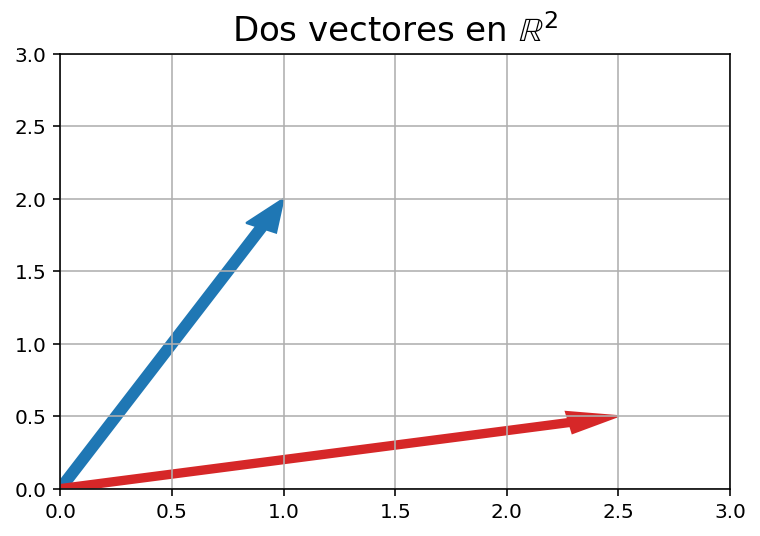

In [5]:
x = np.array([1, 2])
y = np.array([2.5, 0.5])

plt.arrow(0, 0, *x, width=0.05, length_includes_head=True,
          color="tab:blue", )
plt.arrow(0, 0, *y, width=0.05, length_includes_head=True,
          color="tab:red")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.title(r"Dos vectores en $\mathbb{R}^2$", fontsize=17)
plt.grid()

* En una base de datos, un vector estaría dado por una columna dentro de la base (una columna dentro de un Pandas DataFrame)
* Una serie de tiempo sobre el precio de una acción estaría dada por un vector

### Matrices

Una matriz $\bf X$ es un arreglo bi-dimensional de números (equivalente a un numpy array con `ndim == 2`). Denotaremos la $(i, j)$-ésima entrada de una matriz $\bf X$ por medio de $X_{i,j}$.

$$
{\bf X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,M} \\
x_{1,1} & x_{1,2} & \ldots & x_{2,M} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,M}
\end{bmatrix}
$$

A fin de hacer la notación más compacta, declararemos una matriz $\bf A$ con $N$ filas y $M$ columnas como

$$
    {\bf A} \in \mathbb{R}^{N\times M}
$$

In [6]:
X = np.array([
    [1.4, 0.5, 0.5],
    [3.1, 1.9, 9.4],
    [0.9, 1.1, 1.3]
])


In [7]:
# Accedemos a la posición i,j de X
i, j = 0, 2
X[i, j]

0.5

#### Notas:

1. Una matriz ${\bf A} \in \mathbb{R}^{n\times n}$ es conocida como una matriz cuadrada
2. Denotamos la matriz identidad $\bf I\in \mathbb{R}^{n\times n}$ como una matriz cuadrada tal que $I_{i,j} = \mathbb{1}_{i=j}$
3. Matemáticamente, expresamos un vector como un vector columna, es decir, ${\bf a} \in \mathbb{R}^{n\times 1}$.

### Propiedades de las martrices

#### Transpuesta

Denotamos la transpuesta de una matriz $\bf X$ como ${\bf X}^T$ y esta la definimos como
$$
    ({\bf X}^T)_{i,j} = {\bf X}_{j,i}
$$

In [8]:
X

array([[1.4, 0.5, 0.5],
       [3.1, 1.9, 9.4],
       [0.9, 1.1, 1.3]])

In [9]:
# En numpy accedemos a la transpuesta de una matriz por medio
# del operador .T
X.T

array([[1.4, 3.1, 0.9],
       [0.5, 1.9, 1.1],
       [0.5, 9.4, 1.3]])

In [10]:
X.T[i,j] == X[j,i]

True

#### Producto entrada a entrada (Hadamard)

Denotaremos el producto entrada a entrada entre dos matrices ${\bf A} \in \mathbb{R}^{N\times M}$, ${\bf B} \in \mathbb{R}^{N\times M}$ como
$$
    {\bf A} \odot {\bf B}
$$

Tal que $({\bf A} \odot {\bf B})_{i,j} = A_{i,j} B_{i, j}$

In [11]:
A = np.array([
    [1, 3],
    [4, 1]
])

B = np.array([
    [0, 1],
    [1, 2]
])

In [12]:
# En numpy, denotamos el producto entrada a entrada entre dos matrices
# A, B por medio de * 
A * B

array([[0, 3],
       [4, 2]])

#### Multiplicación de matrices y vectores

Definimos el producto punto entre dos vectores $a, b \in \mathbb{R}^n$ como 

$$
    {\bf a}^T {\bf b} = \sum_{i=1}^n a_i b_i
$$

In [13]:
# Podemos calcular el producto punto entre dos numpy arrays
# a, b por medio de @
a = np.array([1, 4, 0.5, 4])
b = np.array([2, 0.9, 1, 2])

a.T @ b # == (a * b).sum()

14.1

Sean ${\bf A} \in \mathbb{R}^{n\times m}$, ${\bf B} \in \mathbb{R}^{m\times o}$, definimos la multiplicación entre $\bf A$ y $\bf B$ como una matriz $\bf C$ tal que

$$
    C_{i,j} = \sum_{k}A_{i,k}B_{k,j}
$$

**nota**: La definición de multiplicación de matrices está definida siempre y cuando $\bf A$ tenga el mismo número de columnas como filas tenga $\bf B$

In [14]:
A = np.array([
    [1, 3, 4],
    [4, 5, 1],
    [4, 1, 3],
    [0, 0, 1],
    
])

B = np.array([
    [2.0, 1.0, 0.7],
    [0.5, 0.5, 0.4],
    [0.4, 1.1, 3.5],
    [1.4, 5.6, 1.9],
    
]).T

In [15]:
# En numpy, dadas dos matrices A y B, calculamos la multiplicación
# matricial entre A y B por medio de @
C = A @ B
C

array([[ 7.8,  3.6, 17.7, 25.8],
       [13.7,  4.9, 10.6, 35.5],
       [11.1,  3.7, 13.2, 16.9],
       [ 0.7,  0.4,  3.5,  1.9]])

In [16]:
i, j = 0, 1
C[i, j] # == (A[i, :] * B[:, j]).sum()

3.6

#### Matrices Inversas

Denotamos la inversa de una matriz ${\bf A} \in \mathbb{R}^{n\times n}$ como ${\bf A}^{-1}$ y es definida de tal manera que

$$
    {\bf A}^{-1}{\bf A} = {\bf I}
$$

In [20]:
A = np.array([
    [4, 3],
    [3, 2],
])

Ai = np.array([
    [-2,  3],
    [ 3, -4]
])

A @ Ai

array([[1, 0],
       [0, 1]])

En numpy podemos calcular la inversa de una matriz por medio de la función `inv` dentro de `numpy.linalg`

In [21]:
from numpy.linalg import inv
inv(A)

array([[-2.,  3.],
       [ 3., -4.]])

#### Sistemas de ecuaciones

Una de las aplicaciones de una matriz inversa es la resolución de un sistema lineal de ecuaciones: Sea ${\bf A} \in \mathbb{R}^{n\times n}$, ${\bf x} \in \mathbb{R}^{n}$ y ${\bf b} \in \mathbb{R}^{n}$ donde ${\bf A}$ y ${\bf b}$ son una matriz y un vector conocido respectivamente. Queremos encontrar ${\bf x}$ tal que satisfaga

$$
\begin{align}
    &{\bf A}{\bf x} = {\bf b} \\
    \implies &  {\bf A}^{-1}{\bf A}{\bf x} = {\bf A}^{-1}{\bf b} \\
    \implies &  {\bf x} = {\bf A}^{-1}{\bf b} \\
\end{align}
$$

In [ ]:
A = np.array([
    [1, 4],
    [3, 4]
])

b = np.array([1, -1]).reshape(-1, 1)

In [22]:
# Forma explicita de resolver el sistema
inv(A) @ b

array([[-1. ],
       [ 0.5]])

In [23]:
from numpy.linalg import solve
# La función solve dentro de numpy.linalg contiene un
# algoritmo más eficiente y preciso para resolver un sistema
# de ecuaciones
solve(A, b)

array([[-1. ],
       [ 0.5]])

### Propiedades Adicionales de Matrices

$$
    {\bf A}({\bf B} + {\bf C}) = {\bf A}{\bf B} + {\bf A}{\bf C}
$$

$$
    ({\bf A}{\bf B}){\bf C} =  {\bf A}({\bf B}{\bf C})
$$

$$
    ({\bf A}{\bf B})^T = {\bf B}^T{\bf A}^T
$$

$$
    ({\bf A}{\bf B})^{-1} = {\bf B}^{-1}{\bf A}^{-1}
$$

**Referncias Adicionales**

* [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)
* [Portfolio Theory with Matrix Algebra](https://faculty.washington.edu/ezivot/econ424/portfolioTheoryMatrix.pdf)
* [Deep Learning Chapter 2: Lineal Algebra](https://www.deeplearningbook.org/contents/linear_algebra.html)

## Estadística y Probabilidad

La finalidad de modelos de machine learning es extraer patrones desde datos. Para encontrar patrones uno tiene que lidiar con la incertidumbre.

La teoria de la probabilidad nos provee de herramientas para trabajar y manipular la incertidumbre; su estudio es escencial para modelos de machine learning.

#### Variables Aleatorias Discretas

Para lograr poder medir la incertidumbre de un evento consideraremos una variable aletoria la cuál

Si $X$ toma un número contable (finito o infinito) de elementos, decimos que $X$ es una variable aleatoria discreta.

> Al escribir $X$ no hacemos referencia a ningún valor en especifico, $X$ representa todos los posibles valores que este podría tomar

A una variable aleatoria $X$ se le asocia una función de probabilidad la cuál denotamos por $p$. Entonces, denotamos por $p(X = x)$ la probabilida de que $X$ tome un valor $x$.

Para una función de probabillidad definida sobre una variable aleatoria discreta $X$ requerimos 
* $ \forall x\in X. p(X = x) \in [0, 1]$
* $\sum_{x\in X} p(X = x) = 1$

La función $p$ puede ser usada para calcular la probabilidad de 1 o más elementos. Denotamos por $p(X=x_1, X=x_2)$ como la probabilidad que 

Sean $A$ y $B$ dos eventos entonces,

* $p(A \cup B) = p(A) + p(B) - p(A \cap B)$
* $p(A, B) = p(A) p(B|A)$

Si $X$ toma un número no contable de elementos, decimos que $X$ es una variable aleatoria continua.

---

Un poco más formalmente, aunque informal de todos modos, definimos una variable aleatoria como una función de un espacio $\Omega$ a los números reales, i.e., $X: \Omega \to \mathbb{R}$

In [24]:
from numpy.random import normal

In [ ]:
X = normal # Una variable aleatoria

In [30]:
# X nos arroja un elemento una vez valuado. Cada evaluación podría
# ser diferente de una anterior
X()

0.05672969483807066

**Variables Aleatorias**  
Una 

**Función de distribución**  
